In [1]:
import os
import h5py
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Directory containing the .mat files
data_directory = '/home/saher/Documents/music'

# List all .mat files in the directory, sorted to ensure sequential loading
mat_files = sorted([f for f in os.listdir(data_directory) if f.endswith('.mat')])

# Initialize lists for features and labels
X = []
y = []

# Loop through each .mat file (each participant)
for i, mat_file in enumerate(mat_files):
    file_path = os.path.join(data_directory, mat_file)
    
    # Checkpoint: File loading
    print(f"Loading file {i+1}/{len(mat_files)}: {mat_file}")
    
    with h5py.File(file_path, 'r') as f:
        # Access the powspctrm data in the data_tf struct
        data = f['data_tf']['powspctrm'][:]
        print(f"Loaded 'powspctrm' data with shape {data.shape} from {mat_file}")
        
        # Skip the first 5 seconds (first dimension is time)
        data = data[5:]
        print(f"Data shape after skipping first 5 seconds: {data.shape}")

        # Loop through each clip and second to extract 2D features
        for clip in range(40):
            for sec in range(60):
                # Extract and reshape to 2D (channel x frequency)
                features_2d = data[sec, :, :, clip].reshape(204, 45)
                X.append(features_2d.flatten())
                y.append(i)  # Label is the participant index (0 to 29)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Data prepared for XGBoost: Features shape {X.shape}, Labels shape {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/home/saher/.local/lib/python3.12/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Loading file 1/30: Sub01SDRM_TFAnalysis.mat
Loaded 'powspctrm' data with shape (65, 45, 204, 40) from Sub01SDRM_TFAnalysis.mat
Data shape after skipping first 5 seconds: (60, 45, 204, 40)
Loading file 2/30: Sub02CHEM_TFAnalysis.mat
Loaded 'powspctrm' data with shape (65, 45, 204, 40) from Sub02CHEM_TFAnalysis.mat
Data shape after skipping first 5 seconds: (60, 45, 204, 40)
Loading file 3/30: Sub03MARM_TFAnalysis.mat
Loaded 'powspctrm' data with shape (65, 45, 204, 40) from Sub03MARM_TFAnalysis.mat
Data shape after skipping first 5 seconds: (60, 45, 204, 40)
Loading file 4/30: Sub04LUIM_TFAnalysis.mat
Loaded 'powspctrm' data with shape (65, 45, 204, 40) from Sub04LUIM_TFAnalysis.mat
Data shape after skipping first 5 seconds: (60, 45, 204, 40)
Loading file 5/30: Sub05CAMM_TFAnalysis.mat
Loaded 'powspctrm' data with shape (65, 45, 204, 40) from Sub05CAMM_TFAnalysis.mat
Data shape after skipping first 5 seconds: (60, 45, 204, 40)
Loading file 6/30: Sub06SASM_TFAnalysis.mat
Loaded 'powspctr

In [2]:
# Initialize XGBoost Classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Overall accuracy: {accuracy}")

Confusion Matrix:
[[482   0   0   0   1   0   0   6   1   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0   0   0   2   0   0   0]
 [  0 457   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   1   0   3   1   1   0]
 [  0   0 467   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0 470   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   2   0   2   0   0   0]
 [  0   0   0   0 456   0   1   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   1   0   0   1]
 [  0   0   0   1   1 474   0   0   1   0   0   0   0   0   2   0   1   0
    1   0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   1 498   0   0   1   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   1   0   1   0   0   0]
 [  1   0   0   0   0   0   0 464   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0

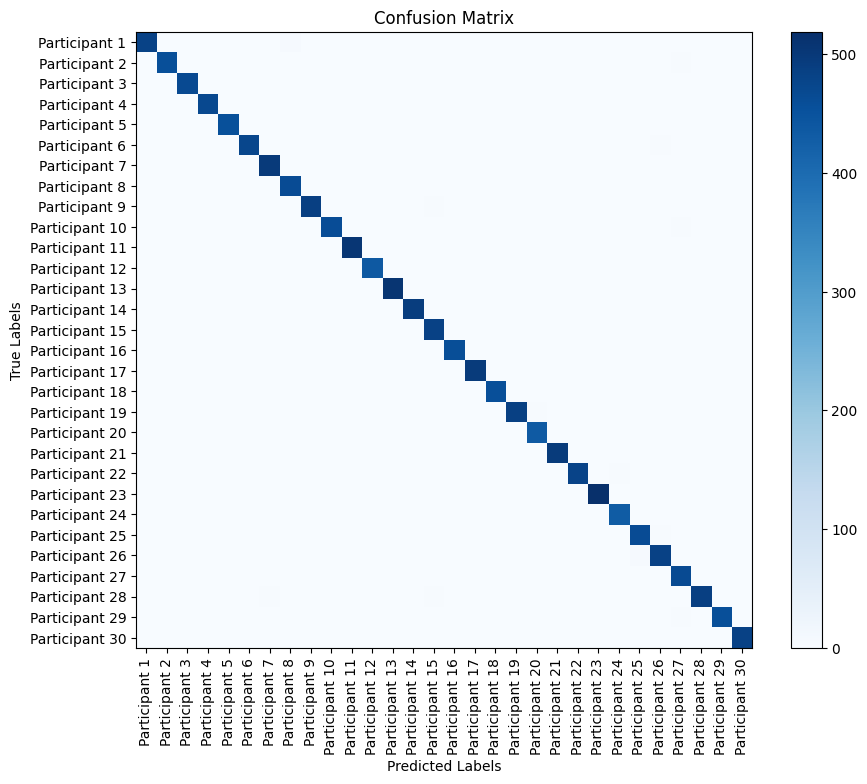

Classification Report:
                precision    recall  f1-score   support

 Participant 1       1.00      0.98      0.99       494
 Participant 2       1.00      0.98      0.99       465
 Participant 3       1.00      1.00      1.00       468
 Participant 4       0.99      0.99      0.99       476
 Participant 5       0.99      0.99      0.99       461
 Participant 6       0.99      0.98      0.99       484
 Participant 7       0.99      0.99      0.99       503
 Participant 8       0.98      1.00      0.99       466
 Participant 9       0.99      0.99      0.99       493
Participant 10       0.99      0.99      0.99       466
Participant 11       0.99      0.99      0.99       508
Participant 12       1.00      1.00      1.00       437
Participant 13       1.00      1.00      1.00       509
Participant 14       1.00      1.00      1.00       493
Participant 15       0.98      0.98      0.98       492
Participant 16       1.00      1.00      1.00       460
Participant 17       0.9

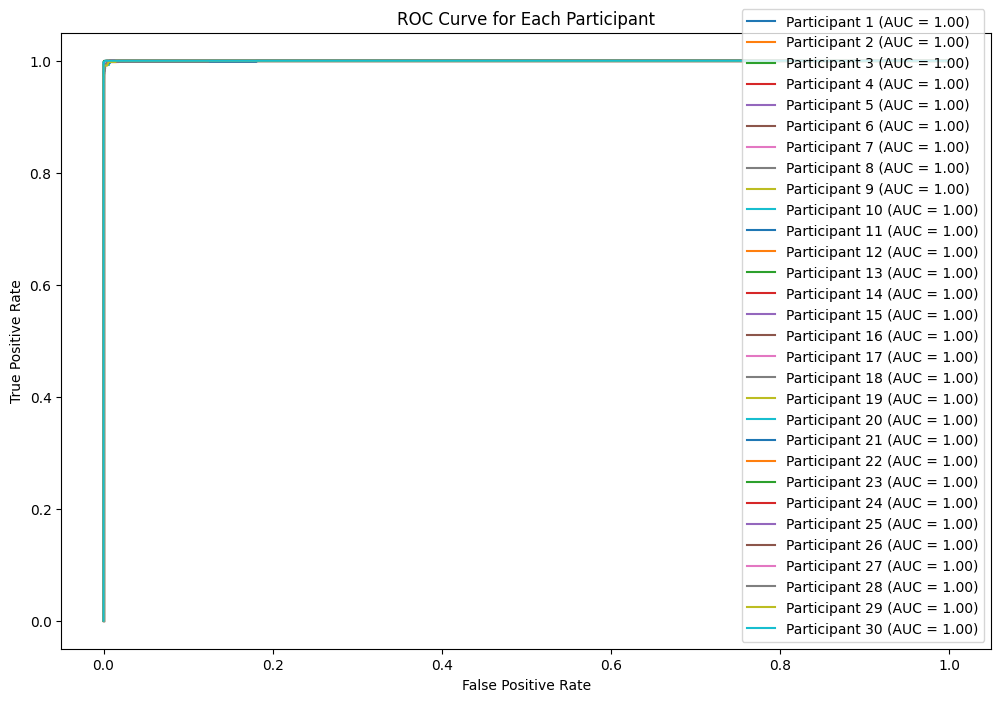

<Figure size 1000x800 with 0 Axes>

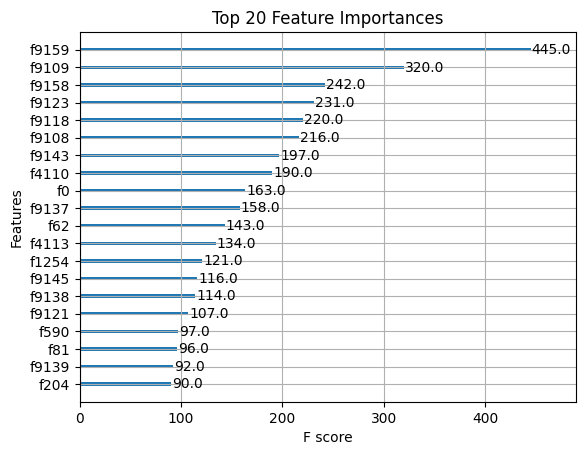

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [f'Participant {i+1}' for i in range(30)]
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=90)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
report = classification_report(y_test, predictions, target_names=[f'Participant {i+1}' for i in range(30)])
print("Classification Report:")
print(report)


# Plot Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=20)
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Participant Prediction Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()